In [1]:
import sys
sys.path.insert(0, "./../../scripts")

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["font.sans-serif"] = ["PT Sans","DejaVu Sans"]

# Plot Relative Error in Simulated vs Theoretical Response Statistics from Supp Fig S2a,b

In [4]:
nori = 20

In [ ]:
sim_vsm_base_means = np.zeros((6))
sim_vsm_base_stds = np.zeros((6))
sim_vsm_opto_means = np.zeros((6))
sim_vsm_opto_stds = np.zeros((6))
sim_vsm_diff_means = np.zeros((6))
sim_vsm_diff_stds = np.zeros((6))
sim_vsm_norm_covs = np.zeros((6))
sim_vsm_base_bals = np.zeros((6))
sim_vsm_opto_bals = np.zeros((6))
sim_μrEs = np.zeros((6,3,nori))
sim_μrIs = np.zeros((6,3,nori))
sim_ΣrEs = np.zeros((6,4,nori))
sim_ΣrIs = np.zeros((6,4,nori))
sim_μhEs = np.zeros((6,3,nori))
sim_μhIs = np.zeros((6,3,nori))
sim_ΣhEs = np.zeros((6,4,nori))
sim_ΣhIs = np.zeros((6,4,nori))
sim_balEs = np.zeros((6,2,nori))
sim_balIs = np.zeros((6,2,nori))

for c_idx in range(6):
    with open("./../../model_data/best_fit_1s_c_{:d}".format(c_idx)+".pkl","rb") as handle:
        res_dict = pickle.load(handle)

    sim_vsm_base_means[c_idx] = res_dict["vsm_base_means"]
    sim_vsm_base_stds[c_idx] = res_dict["vsm_base_stds"]
    sim_vsm_opto_means[c_idx] = res_dict["vsm_opto_means"]
    sim_vsm_opto_stds[c_idx] = res_dict["vsm_opto_stds"]
    sim_vsm_diff_means[c_idx] = res_dict["vsm_diff_means"]
    sim_vsm_diff_stds[c_idx] = res_dict["vsm_diff_stds"]
    sim_vsm_norm_covs[c_idx] = res_dict["vsm_norm_covs"]
    sim_vsm_base_bals[c_idx] = 0.8*np.mean(res_dict["balEs"],0)[0,0]+0.2*np.mean(res_dict["balIs"],0)[0,0]
    sim_vsm_opto_bals[c_idx] = 0.8*np.mean(res_dict["balEs"],0)[1,0]+0.2*np.mean(res_dict["balIs"],0)[1,0]
    sim_μrEs[c_idx] = np.mean(res_dict["μrEs"],0)
    sim_μrIs[c_idx] = np.mean(res_dict["μrIs"],0)
    sim_ΣrEs[c_idx] = np.mean(res_dict["ΣrEs"],0)
    sim_ΣrIs[c_idx] = np.mean(res_dict["ΣrIs"],0)
    sim_μhEs[c_idx] = np.mean(res_dict["μhEs"],0)
    sim_μhIs[c_idx] = np.mean(res_dict["μhIs"],0)
    sim_ΣhEs[c_idx] = np.mean(res_dict["ΣhEs"],0)
    sim_ΣhIs[c_idx] = np.mean(res_dict["ΣhIs"],0)
    sim_balEs[c_idx] = np.mean(res_dict["balEs"],0)
    sim_balIs[c_idx] = np.mean(res_dict["balIs"],0)
        
sim_preds = np.concatenate((
    sim_vsm_base_means[:,None],
    sim_vsm_opto_means[:,None],
    sim_vsm_base_stds[:,None],
    sim_vsm_opto_stds[:,None],
    sim_vsm_diff_stds[:,None],
    sim_vsm_norm_covs[:,None],
    sim_vsm_diff_means[:,None],
),1)
        
sim_Epreds = np.concatenate((
    sim_μrEs[:,0:1,:],
    sim_μrEs[:,1:2,:],
    np.sqrt(sim_ΣrEs[:,0:1,:]),
    np.sqrt(sim_ΣrEs[:,1:2,:]),
    np.sqrt(sim_ΣrEs[:,2:3,:]),
    sim_ΣrEs[:,3:4,:]/sim_ΣrEs[:,2:3,:],
    sim_μrEs[:,2:3,:]
),1)

sim_Ipreds = np.concatenate((
    sim_μrIs[:,0:1,:],
    sim_μrIs[:,1:2,:],
    np.sqrt(sim_ΣrIs[:,0:1,:]),
    np.sqrt(sim_ΣrIs[:,1:2,:]),
    np.sqrt(sim_ΣrIs[:,2:3,:]),
    sim_ΣrIs[:,3:4,:]/sim_ΣrIs[:,2:3,:],
    sim_μrIs[:,2:3,:]
),1)

In [ ]:
dmft_vsm_base_means = np.zeros((6))
dmft_vsm_base_stds = np.zeros((6))
dmft_vsm_opto_means = np.zeros((6))
dmft_vsm_opto_stds = np.zeros((6))
dmft_vsm_diff_means = np.zeros((6))
dmft_vsm_diff_stds = np.zeros((6))
dmft_vsm_norm_covs = np.zeros((6))
dmft_vsm_base_bals = np.zeros((6))
dmft_vsm_opto_bals = np.zeros((6))
dmft_μrEs = np.zeros((6,3,nori))
dmft_μrIs = np.zeros((6,3,nori))
dmft_ΣrEs = np.zeros((6,4,nori))
dmft_ΣrIs = np.zeros((6,4,nori))
dmft_balEs = np.zeros((6,2,nori))
dmft_balIs = np.zeros((6,2,nori))

for c_idx in range(6):
    with open("./../../model_data/dmft_best_fit_c_{:d}".format(c_idx)+".pkl","rb") as handle:
        res_dict = pickle.load(handle)

    dmft_vsm_base_means[c_idx] = res_dict["vsm_base_means"]
    dmft_vsm_base_stds[c_idx] = res_dict["vsm_base_stds"]
    dmft_vsm_opto_means[c_idx] = res_dict["vsm_opto_means"]
    dmft_vsm_opto_stds[c_idx] = res_dict["vsm_opto_stds"]
    dmft_vsm_diff_means[c_idx] = res_dict["vsm_diff_means"]
    dmft_vsm_diff_stds[c_idx] = res_dict["vsm_diff_stds"]
    dmft_vsm_norm_covs[c_idx] = res_dict["vsm_norm_covs"]
    dmft_vsm_base_bals[c_idx] = 0.8*res_dict["balEs"][0,0]+0.2*res_dict["balIs"][0,0]
    dmft_vsm_opto_bals[c_idx] = 0.8*res_dict["balEs"][1,0]+0.2*res_dict["balIs"][1,0]
    dmft_μrEs[c_idx] = res_dict["μrEs"]
    dmft_μrIs[c_idx] = res_dict["μrIs"]
    dmft_ΣrEs[c_idx] = res_dict["ΣrEs"]
    dmft_ΣrIs[c_idx] = res_dict["ΣrIs"]
    dmft_balEs[c_idx] = res_dict["balEs"]
    dmft_balIs[c_idx] = res_dict["balIs"]
        
dmft_preds = np.concatenate((
    dmft_vsm_base_means[:,None],
    dmft_vsm_opto_means[:,None],
    dmft_vsm_base_stds[:,None],
    dmft_vsm_opto_stds[:,None],
    dmft_vsm_diff_stds[:,None],
    dmft_vsm_norm_covs[:,None],
    dmft_vsm_diff_means[:,None],
),1)
        
dmft_Epreds = np.concatenate((
    dmft_μrEs[:,0:1,:],
    dmft_μrEs[:,1:2,:],
    np.sqrt(dmft_ΣrEs[:,0:1,:]),
    np.sqrt(dmft_ΣrEs[:,1:2,:]),
    np.sqrt(dmft_ΣrEs[:,2:3,:]),
    dmft_ΣrEs[:,3:4,:]/dmft_ΣrEs[:,2:3,:],
    dmft_μrEs[:,2:3,:]
),1)

dmft_Ipreds = np.concatenate((
    dmft_μrIs[:,0:1,:],
    dmft_μrIs[:,1:2,:],
    np.sqrt(dmft_ΣrIs[:,0:1,:]),
    np.sqrt(dmft_ΣrIs[:,1:2,:]),
    np.sqrt(dmft_ΣrIs[:,2:3,:]),
    dmft_ΣrIs[:,3:4,:]/dmft_ΣrIs[:,2:3,:],
    dmft_μrIs[:,2:3,:]
),1)

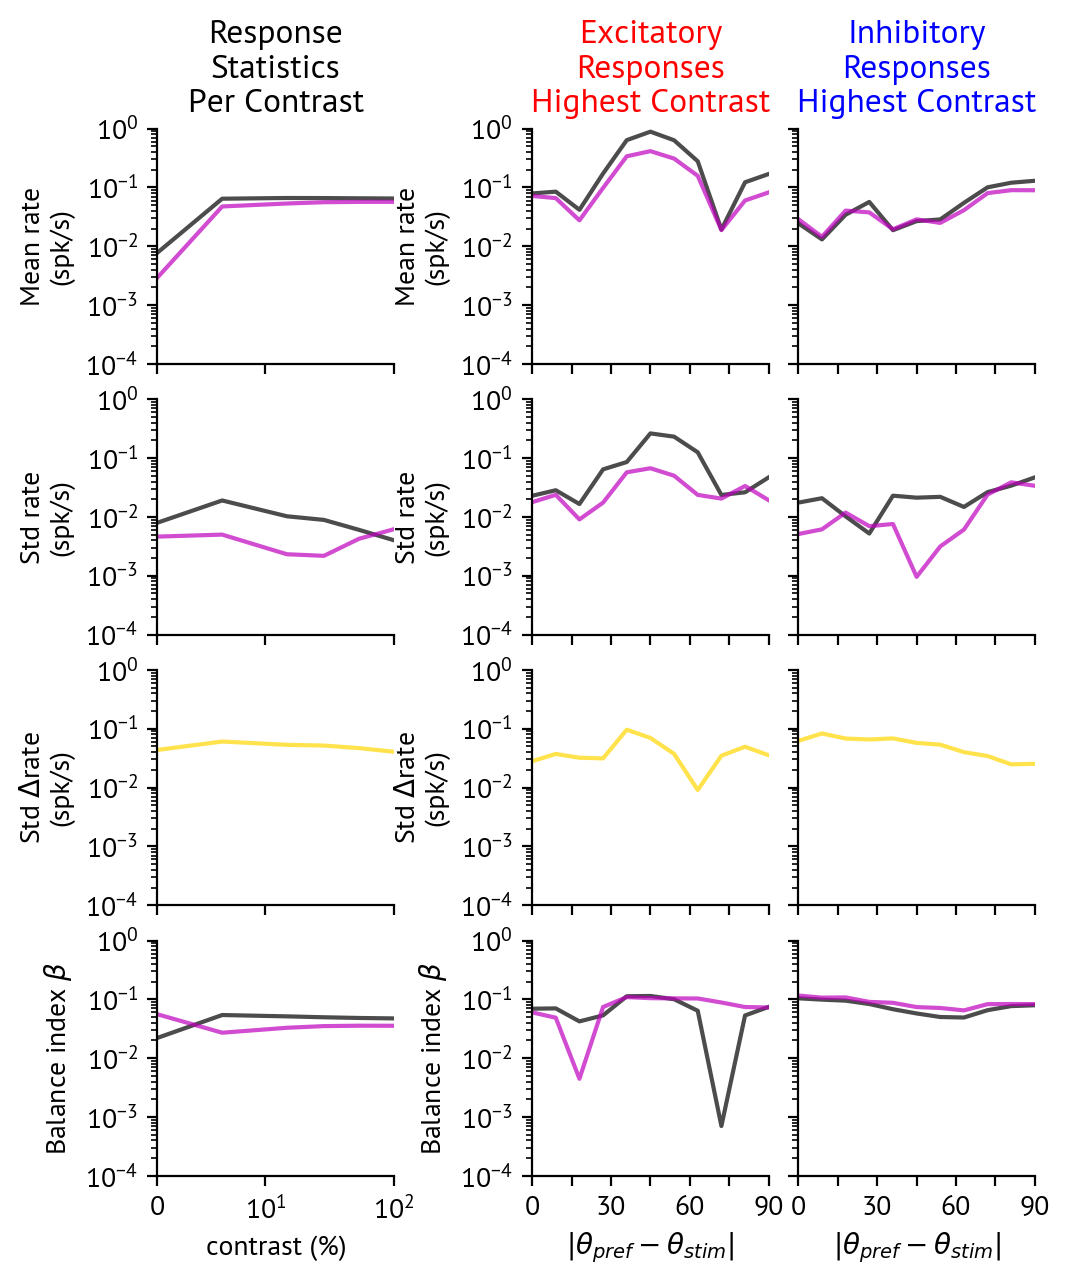

In [ ]:
with open("./../../experimental_data/data_moments"+".pkl", "rb") as handle:
    data_preds = np.transpose(pickle.load(handle)[1],(1,0,2))
with open("./../../experimental_data/data_contrasts"+".pkl", "rb") as handle:
    cons = pickle.load(handle)[1]

oris = np.arange(nori//2+1) * 90/(nori/2)
def abs_ori(A):
    return 0.5*(A[:nori//2+1] + np.concatenate((A[0:1],A[-1:nori//2-1:-1])))

cidx = 5

fig,axs = plt.subplots(4,4,figsize=(1.7*3.33,1.7*4),dpi=200,sharex="col",sharey=True,
                       width_ratios=(3,1,3,3))
fig.subplots_adjust(hspace=0.15,wspace=0.15)
for i in range(4):
    axs[i,1].set_axis_off()
    axs[i,2].yaxis.set_tick_params(which="both",labelleft=True)
axs = axs[:,[0,2,3]]

axs[0,0].plot([-1],[-1],label=r"Data $\pm$ SEM")
axs[0,0].plot([-1],[-1],label="Simulation")
axs[0,0].plot([-1],[-1],label="Theory")
axs[0,0].plot(cons,np.abs(1-dmft_preds[:,0]/sim_preds[:,0]),c="k",ls="-",label="Vis Stim Only",alpha=0.7)
axs[0,0].plot(cons,np.abs(1-dmft_preds[:,1]/sim_preds[:,1]),c="m",ls="-",alpha=0.7)
axs[1,0].plot(cons,np.abs(1-dmft_preds[:,2]/sim_preds[:,2]),c="k",ls="-",alpha=0.7)
axs[1,0].plot(cons,np.abs(1-dmft_preds[:,3]/sim_preds[:,3]),c="m",ls="-",label="Vis+Opto Stim",alpha=0.7)
axs[2,0].plot(cons,np.abs(1-dmft_preds[:,4]/sim_preds[:,4]),c="gold",ls="-",label=r"Opto Evoked $\Delta$Rate",alpha=0.7)
axs[3,0].plot(cons,np.abs(1-dmft_vsm_base_bals/sim_vsm_base_bals),c="k",ls="-",alpha=0.7)
axs[3,0].plot(cons,np.abs(1-dmft_vsm_opto_bals/sim_vsm_opto_bals),c="m",ls="-",alpha=0.7)

axs[0,1].plot(oris,abs_ori(np.abs(1-dmft_Epreds[cidx,0,:]/sim_Epreds[cidx,0,:])),c="k",ls="-",alpha=0.7)
axs[0,1].plot(oris,abs_ori(np.abs(1-dmft_Epreds[cidx,1,:]/sim_Epreds[cidx,1,:])),c="m",ls="-",alpha=0.7)

axs[0,2].plot(oris,abs_ori(np.abs(1-dmft_Ipreds[cidx,0,:]/sim_Ipreds[cidx,0,:])),c="k",ls="-",alpha=0.7)
axs[0,2].plot(oris,abs_ori(np.abs(1-dmft_Ipreds[cidx,1,:]/sim_Ipreds[cidx,1,:])),c="m",ls="-",alpha=0.7)

axs[1,1].plot(oris,abs_ori(np.abs(1-dmft_Epreds[cidx,2,:]/sim_Epreds[cidx,2,:])),c="k",ls="-",alpha=0.7)
axs[1,1].plot(oris,abs_ori(np.abs(1-dmft_Epreds[cidx,3,:]/sim_Epreds[cidx,3,:])),c="m",ls="-",alpha=0.7)

axs[1,2].plot(oris,abs_ori(np.abs(1-dmft_Ipreds[cidx,2,:]/sim_Ipreds[cidx,2,:])),c="k",ls="-",alpha=0.7)
axs[1,2].plot(oris,abs_ori(np.abs(1-dmft_Ipreds[cidx,3,:]/sim_Ipreds[cidx,3,:])),c="m",ls="-",alpha=0.7)

axs[2,1].plot(oris,abs_ori(np.abs(1-dmft_Epreds[cidx,4,:]/sim_Epreds[cidx,4,:])),c="gold",ls="-",alpha=0.7)

axs[2,2].plot(oris,abs_ori(np.abs(1-dmft_Ipreds[cidx,4,:]/sim_Ipreds[cidx,4,:])),c="gold",ls="-",alpha=0.7)

axs[3,1].plot(oris,abs_ori(np.abs(1-dmft_balEs[cidx,0,:]/sim_balEs[cidx,0,:])),c="k",ls="-",alpha=0.7)
axs[3,1].plot(oris,abs_ori(np.abs(1-dmft_balEs[cidx,1,:]/sim_balEs[cidx,1,:])),c="m",ls="-",alpha=0.7)

axs[3,2].plot(oris,abs_ori(np.abs(1-dmft_balIs[cidx,0,:]/sim_balIs[cidx,0,:])),c="k",ls="-",alpha=0.7)
axs[3,2].plot(oris,abs_ori(np.abs(1-dmft_balIs[cidx,1,:]/sim_balIs[cidx,1,:])),c="m",ls="-",alpha=0.7)


for ax in axs.flat:
    ax.spines[["right", "top"]].set_visible(False)

axs[0,0].set_xscale("symlog", linthresh=12)
axs[0,0].set_yscale("log")
nticks = 7
ticks = np.array(["{:.0f}".format(ori) for ori in np.linspace(0,90,nticks)])
ticks[1::2] = ""
for i in range(1,3):
    axs[0,i].set_xticks(np.linspace(0,90,7),ticks)

axs[0,0].set_xlim(0,100)
axs[0,1].set_xlim(0,90)
axs[0,2].set_xlim(0,90)
axs[0,0].set_ylim(0.0001,1)

axs[3,0].set_xlabel("contrast (%)")
axs[3,1].set_xlabel(r"$|\theta_{pref}-\theta_{stim}|$")
axs[3,2].set_xlabel(r"$|\theta_{pref}-\theta_{stim}|$")

for i in [0,1]:
    axs[0,i].set_ylabel("Mean rate\n(spk/s)")
    axs[1,i].set_ylabel("Std rate\n(spk/s)")
    axs[2,i].set_ylabel(r"Std $\Delta$rate"+"\n(spk/s)")
    axs[3,i].set_ylabel(r"Balance index $\beta$")

axs[0,0].set_title("Response\nStatistics\nPer Contrast",color="k")
axs[0,1].set_title("Excitatory\nResponses\nHighest Contrast",color="r")
axs[0,2].set_title("Inhibitory\nResponses\nHighest Contrast",color="b")

# fig.tight_layout()
fig.savefig("./supp_fig_2ab.pdf")